In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [17]:
file_path = "StudentsPerformance.csv"
df = pd.read_csv(file_path)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [19]:
encoder = LabelEncoder()
for col in ['gender','lunch','test preparation course']:
    df[col] = encoder.fit_transform(df[col])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,bachelor's degree,1,1,72,72,74
1,0,group C,some college,1,0,69,90,88
2,0,group B,master's degree,1,1,90,95,93
3,1,group A,associate's degree,0,1,47,57,44
4,1,group C,some college,1,1,76,78,75


In [20]:
ordenc = OrdinalEncoder(categories=[['some high school','high school','some college',"associate's degree","bachelor's degree","master's degree"]])
df['education'] = ordenc.fit_transform(df[['parental level of education']])
df = df.drop('parental level of education',axis=1)
df.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,education
0,0,group B,1,1,72,72,74,4.0
1,0,group C,1,0,69,90,88,2.0
2,0,group B,1,1,90,95,93,5.0
3,1,group A,0,1,47,57,44,3.0
4,1,group C,1,1,76,78,75,2.0


In [21]:
ohe = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encarr = ohe.fit_transform(df[['race/ethnicity']])
encnames = ohe.get_feature_names_out(['race/ethnicity'])
encdf = pd.DataFrame(encarr,columns=encnames,index=df.index)
df = pd.concat([df,encdf],axis=1)
df = df.drop(['race/ethnicity'],axis=1)
df.head()

,gender,lunch,test preparation course,math score,reading score,writing score,education,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,0,1,1,72,72,74,4.0,0.0,1.0,0.0,0.0,0.0
1,0,1,0,69,90,88,2.0,0.0,0.0,1.0,0.0,0.0
2,0,1,1,90,95,93,5.0,0.0,1.0,0.0,0.0,0.0
3,1,0,1,47,57,44,3.0,1.0,0.0,0.0,0.0,0.0
4,1,1,1,76,78,75,2.0,0.0,0.0,1.0,0.0,0.0


In [25]:
scaler = StandardScaler()
df[['reading score','writing score']] = scaler.fit_transform(df[['reading score','writing score']])
df.head()

,gender,lunch,test preparation course,math score,reading score,writing score,education,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,0,1,1,72,0.193999,0.391492,4.0,0.0,1.0,0.0,0.0,0.0
1,0,1,0,69,1.427476,1.313269,2.0,0.0,0.0,1.0,0.0,0.0
2,0,1,1,90,1.770109,1.642475,5.0,0.0,1.0,0.0,0.0,0.0
3,1,0,1,47,-0.833899,-1.583744,3.0,1.0,0.0,0.0,0.0,0.0
4,1,1,1,76,0.605158,0.457333,2.0,0.0,0.0,1.0,0.0,0.0


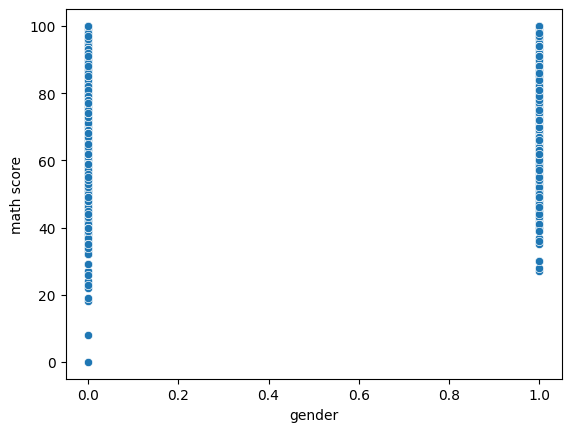

In [22]:
sns.scatterplot(x='gender',y='math score',data=df)
plt.show()

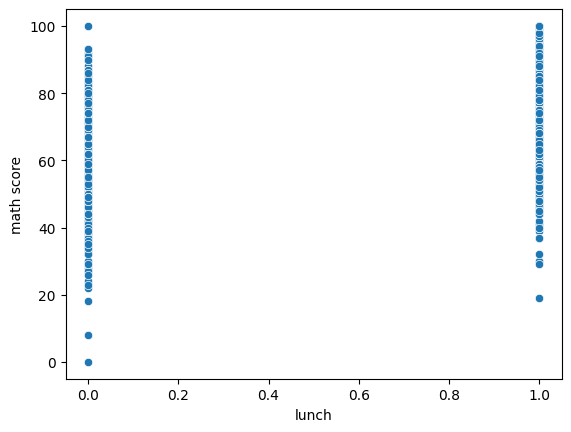

In [23]:
sns.scatterplot(x='lunch',y='math score',data=df)
plt.show()

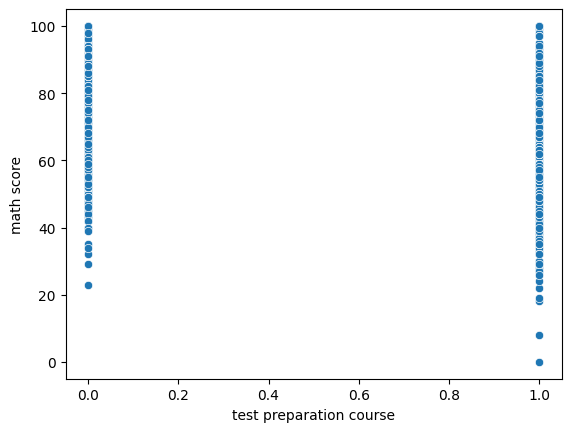

In [24]:
sns.scatterplot(x='test preparation course',y='math score',data=df)
plt.show()

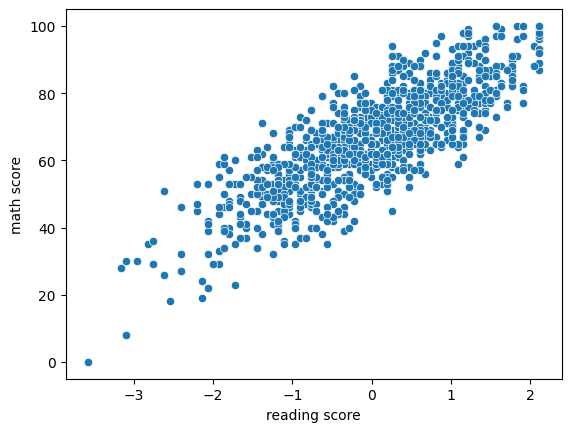

In [26]:
sns.scatterplot(x='reading score',y='math score',data=df)
plt.show()

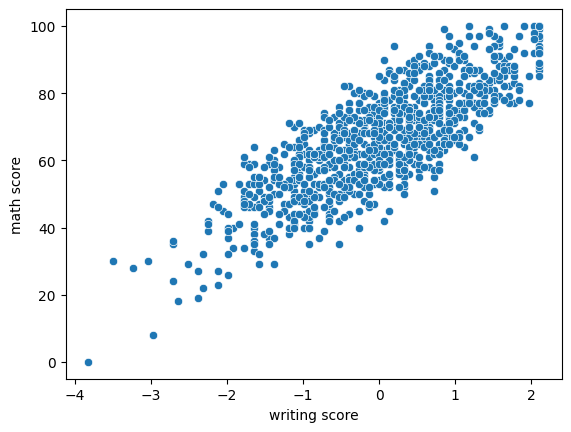

In [27]:
sns.scatterplot(x='writing score',y='math score',data=df)
plt.show()

In [28]:
X=df.drop(['math score'],axis=1)
y=df['math score']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [29]:
poly = PolynomialFeatures(degree=3)

In [30]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [31]:
reg = LinearRegression()

In [33]:
reg.fit(X_train_poly,y_train)

LinearRegression()